<a href="https://colab.research.google.com/github/Aleksandra2002/obliczenia_naukowe/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'>
(524, 800, 3)


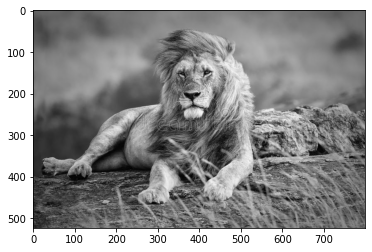

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from skimage.io import imread, imsave #wczytywanie i zapisywanie obrazków
im=imread('https://thumbs.dreamstime.com/b/mighty-beautiful-lion-resting-african-savannah-black-white-kenya-96042281.jpg')
print(type(im))
print(im.shape)
plt.imshow(im)

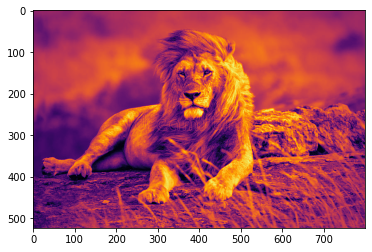

In [3]:
plt.imshow(im[:,:,1],cmap='inferno')

In [12]:
im2=0.299*im[:,:,0]+0.587*im[:,:,1]+0.114*im[:,:,2]
im2.shape
im3=im2[:,:524]
wartosci, P =np.linalg.eig(im3)

In [18]:
org = P @ np.diag(wartosci) @ np.linalg.inv(P)
(org-im3).round(2) #wychodzi orginalny obraz

array([[ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       ...,
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j, ..., -0.-0.j,  0.+0.j,  0.+0.j]])

In [37]:
wartosci2 =np.hstack([wartosci, np.array([1])])

###np.zeros_like() - macierz zer przyjmująca kształt innej macierzy
###np.vstack() - doklejanie (lista tablic, ktore zkleic)

In [36]:
zera = np.zeros(shape=(1,524))
P2=np.vstack([P,zera])
jedynki=np.ones(shape=(525,1))
P3=np.hstack([P2,jedynki])
np.linalg.det(P3)

(-3.811157790997508e-302-9.30871727e-316j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


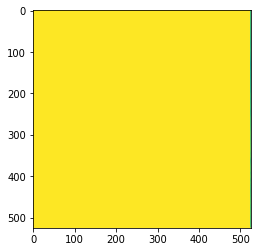

In [41]:
orgnew = (P3 @ np.diag(wartosci2) @ np.linalg.inv(P3)).astype(float)
plt.imshow(orgnew)

#3D

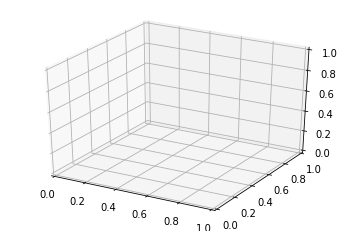

In [43]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax1=fig.add_subplot(projection='3d')

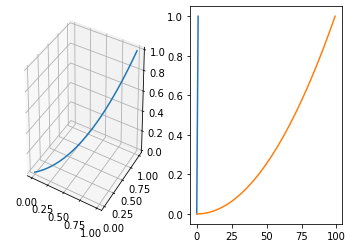

In [44]:
%matplotlib inline
x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
z=x*y
fig=plt.figure()
ax1=fig.add_subplot(121,projection='3d')
ax1.plot(x,y,z)
ax2=fig.add_subplot(122)
ax2.plot(x,y,z)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


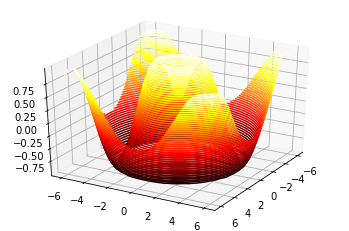

In [51]:
def f(x,y):
  return np.sin(np.sqrt(x**2+y**2))
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)
X,Y = np.meshgrid(x,y)
Z=f(X,Y)
fig = plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='hot')
ax.view_init(elev=30,azim=30)

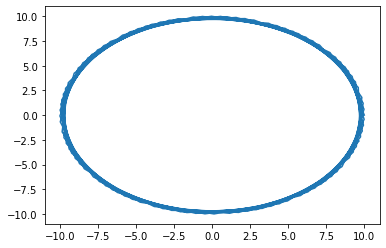

In [75]:
from re import T
fig,ax =plt.subplots()
t=np.linspace(0,50,100)
R=10
r=5
x=np.cos(t*(R-r)/r)*r +(R-r)*np.cos(t)
y=np.sin(t*(R-r)/r)*r +(R-r)*np.sin(t)

ax.plot(x,y)